In [132]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [133]:
df_no = pd.read_excel("data_washed/norway_smokers.xlsx").drop(columns=["Unnamed: 0"])
df_no = df_no.rename(columns={"Unnamed: 2": "Year", "Unnamed: 3": "smokers_percentage"})
df_no["Year"] = pd.to_numeric(df_no["Year"], errors="coerce")
df_no = df_no.dropna(subset=["Year", "smokers_percentage"]).reset_index(drop=True)
df_no["Year"] = df_no["Year"].astype(int)
df_no



,Year,smokers_percentage
0,1973,42.0
1,1974,41.0
2,1975,41.0
3,1976,39.0
4,1977,38.0
5,1978,38.0
6,1979,37.0
7,1980,36.0
8,1981,36.0
9,1982,36.0


In [134]:
data_sp = {
    # '1978': 41.0,
    # '1987': 39.5,
    # '1993': 37.0,
    '1997': 36.0,
    '2001': 34.5,
    '2006': 29.5,
    '2009': 27.0,
    '2011': 24.5,
    '2014': 23.0,
    '2017': 21.5,
    '2020': 18.0
}

data_sp = {
    '1997': 36.0, 
    '1998': 35.62, 
    '1999': 35.25, 
    '2000': 34.88, 
    '2001': 34.5, 
    '2002': 33.5, 
    '2003': 32.5, 
    '2004': 31.5, 
    '2005': 30.5, 
    '2006': 29.5, 
    '2007': 28.67, 
    '2008': 27.83, 
    '2009': 27.0, 
    '2010': 25.75, 
    # '2011': 24.5, 
    # '2012': 24.0, 
    # '2013': 23.5, 
    # '2014': 23.0, 
    # '2015': 22.5, 
    # '2016': 22.0, 
    # '2017': 21.5, 
    # '2018': 20.33, 
    # '2019': 19.17, 
    # '2020': 18.0
}

In [135]:
df_sp = pd.Series(data_sp, name='smokers_percentage')
df_sp.index.name = 'Year'

# if you need a DataFrame (columns "Year" and "smokers_percentage"):
df_sp = df_sp.reset_index()
df_sp

,Year,smokers_percentage
0,1997,36.00
1,1998,35.62
2,1999,35.25
3,2000,34.88
4,2001,34.50
5,2002,33.50
6,2003,32.50
7,2004,31.50
8,2005,30.50
9,2006,29.50


In [136]:
df_sp['Year'] = pd.to_numeric(df_sp['Year'], errors='coerce')
df_no['Year']  = pd.to_numeric(df_no['Year'],  errors='coerce')

# drop rows with invalid Year (if any) and cast to int for exact matching
df_sp = df_sp.dropna(subset=['Year']).copy()
df_no  = df_no.dropna(subset=['Year']).copy()
df_sp['Year'] = df_sp['Year'].astype(int)
df_no['Year']  = df_no['Year'].astype(int)

# optional quick check
print(df_sp['Year'].dtype, df_no['Year'].dtype)
# ...existing code...
df_merged = df_sp.merge(df_no, how="left", on="Year", suffixes=("_sp", "_no"))
df_merged

int64 int64


,Year,smokers_percentage_sp,smokers_percentage_no
0,1997,36.00,34.0
1,1998,35.62,33.0
2,1999,35.25,31.0
3,2000,34.88,31.0
4,2001,34.50,29.0
5,2002,33.50,29.0
6,2003,32.50,26.0
7,2004,31.50,26.0
8,2005,30.50,25.0
9,2006,29.50,23.0


In [145]:
df = df_merged.head(14)
df

,Year,smokers_percentage_sp,smokers_percentage_no
0,1997,36.00,34.0
1,1998,35.62,33.0
2,1999,35.25,31.0
3,2000,34.88,31.0
4,2001,34.50,29.0
5,2002,33.50,29.0
6,2003,32.50,26.0
7,2004,31.50,26.0
8,2005,30.50,25.0
9,2006,29.50,23.0


Norway: https://fred.stlouisfed.org/series/CP0220NOM086NEST
Spain: https://fred.stlouisfed.org/series/CP0220ESM086NEST

In [146]:
data_tobakk_sp = {
    '1997': 30,
    '2001': 38,
    '2006': 50,
    '2009': 60,
    '2011': 80,
    '2014': 98,
    '2017': 100,
    '2020': 108
}

data_tobakk_no ={
    '1997': 30,
    '2001': 45,
    '2006': 65,
    '2009': 80,
    '2011': 90,
    '2014': 100,
    '2017': 110,
    '2020': 120
}

# Spain HICP-T Interpolated Data
data_tobakk_sp = {
    '1997': 30.0, '1998': 32.0, '1999': 34.0, '2000': 36.0, '2001': 38.0, 
    '2002': 40.4, '2003': 42.8, '2004': 45.2, '2005': 47.6, '2006': 50.0, 
    '2007': 53.33, '2008': 56.67, '2009': 60.0, '2010': 70.0
    # , '2011': 80.0, 
    # '2012': 86.0, '2013': 92.0, '2014': 98.0, '2015': 98.67, '2016': 99.33, 
    # '2017': 100.0, '2018': 102.67, '2019': 105.33, '2020': 108.0
}

# Norway HICP-T Interpolated Data
data_tobakk_no = {
    '1997': 30.0, '1998': 33.75, '1999': 37.5, '2000': 41.25, '2001': 45.0, 
    '2002': 49.0, '2003': 53.0, '2004': 57.0, '2005': 61.0, '2006': 65.0, 
    '2007': 70.0, '2008': 75.0, '2009': 80.0, '2010': 85.0
    # , '2011': 90.0, 
    # '2012': 93.33, '2013': 96.67, '2014': 100.0, '2015': 103.33, '2016': 106.67, 
    # '2017': 110.0, '2018': 113.33, '2019': 116.67, '2020': 120.0
}

In [147]:

# ...existing code...


# Prepare long panel for DiD using the merged data (df_merged)
# create separate country-year rows from the merged wide frame
df_sp_long = df[['Year', 'smokers_percentage_sp']].rename(
    columns={'smokers_percentage_sp': 'smokers_percentage'}
).assign(Country='Spain')

df_no_long = df[['Year', 'smokers_percentage_no']].rename(
    columns={'smokers_percentage_no': 'smokers_percentage'}
).assign(Country='Norway')

df_long = pd.concat([df_sp_long, df_no_long], ignore_index=True)

# clean and types
df_long['Year'] = pd.to_numeric(df_long['Year'], errors='coerce')
df_long['smokers_percentage'] = pd.to_numeric(df_long['smokers_percentage'], errors='coerce')
df_long = df_long.dropna(subset=['Year', 'smokers_percentage']).reset_index(drop=True)

# DiD variables: Norway indicator, Post2004, and interaction (Treated)
df_long['Norway'] = (df_long['Country'] == 'Norway').astype(int)
df_long['Post2004'] = (df_long['Year'] >= 2004).astype(int)
df_long['Treated'] = df_long['Norway'] * df_long['Post2004']

# Run OLS DiD: smokers_percentage ~ Norway + Post2004 + Treated
X = df_long[['Norway', 'Post2004', 'Treated']]
X = sm.add_constant(X)
y = df_long['smokers_percentage']

model = sm.OLS(y, X).fit()
print("\n" + "="*60)
print("DiD: Norway workplace smoking ban (2004) — outcome: smokers_percentage")
print("="*60)
print(model.summary())

# key result
did_coef = model.params['Treated']
did_p = model.pvalues['Treated']
print(f"\nDiD estimate (Treated): {did_coef:.4f}, p-value: {did_p:.4f}")
# ...existing code...


DiD: Norway workplace smoking ban (2004) — outcome: smokers_percentage
                            OLS Regression Results                            
Dep. Variable:     smokers_percentage   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     38.24
Date:                Wed, 15 Oct 2025   Prob (F-statistic):           2.66e-09
Time:                        15:59:02   Log-Likelihood:                -60.210
No. Observations:                  28   AIC:                             128.4
Df Residuals:                      24   BIC:                             133.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

In [148]:
# make tidy DataFrames
df_tob_sp = pd.Series(data_tobakk_sp).rename_axis('Year').reset_index(name='tobacco_price').assign(Country='Spain')
df_tob_no = pd.Series(data_tobakk_no).rename_axis('Year').reset_index(name='tobacco_price').assign(Country='Norway')
df_tob = pd.concat([df_tob_sp, df_tob_no], ignore_index=True)

# ensure types align
df_tob['Year'] = pd.to_numeric(df_tob['Year'], errors='coerce').astype(int)
df_tob['tobacco_price'] = pd.to_numeric(df_tob['tobacco_price'], errors='coerce')

# merge control into long panel
df_long = df_long.merge(df_tob, on=['Year', 'Country'], how='left')

# if missing prices for some rows, decide: drop or impute. Here we drop missing control rows for regression
reg_df = df_long.dropna(subset=['tobacco_price', 'smokers_percentage', 'Year']).copy()

# DiD variables (ensure they exist)
reg_df['Norway'] = (reg_df['Country'] == 'Norway').astype(int)
reg_df['Post2004'] = (reg_df['Year'] >= 2004).astype(int)
reg_df['Treated'] = reg_df['Norway'] * reg_df['Post2004']

# run OLS DiD with tobacco price control (robust SE)
X = reg_df[['Norway', 'Post2004', 'Treated', 'tobacco_price']]
X = sm.add_constant(X)
y = reg_df['smokers_percentage']

model_ctrl = sm.OLS(y.astype(float), X.astype(float)).fit(cov_type='HC1')
print(model_ctrl.summary())

did_coef = model_ctrl.params.get('Treated')
did_p = model_ctrl.pvalues.get('Treated')
print(f"\nDiD estimate (Treated) with tobacco_price control: {did_coef:.4f}, p-value: {did_p:.4f}")

                            OLS Regression Results                            
Dep. Variable:     smokers_percentage   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     522.2
Date:                Wed, 15 Oct 2025   Prob (F-statistic):           3.30e-22
Time:                        15:59:02   Log-Likelihood:                -24.269
No. Observations:                  28   AIC:                             58.54
Df Residuals:                      23   BIC:                             65.20
Df Model:                           4                                         
Covariance Type:                  HC1                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            44.1952      0.762     57.990

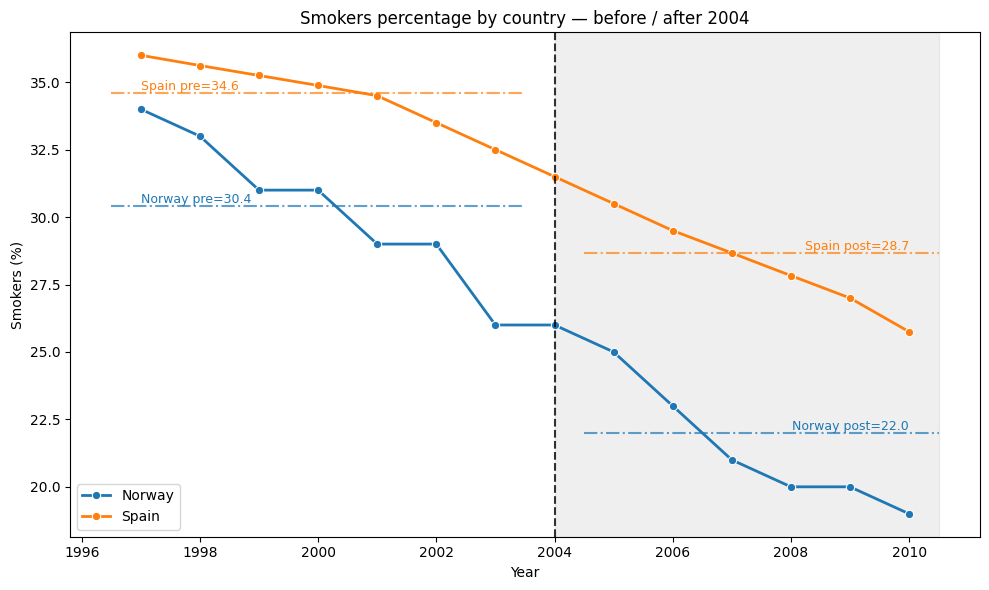

In [149]:
# copy into a new cell


# aggregate to ensure one value per Year x Country
agg = df_long.groupby(['Year', 'Country'])['smokers_percentage'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=agg, x='Year', y='smokers_percentage', hue='Country', marker='o', linewidth=2)

# treatment year line and shading
treatment = 2004
plt.axvline(treatment, color='k', linestyle='--', alpha=0.8)
plt.axvspan(treatment, agg['Year'].max() + 0.5, color='gray', alpha=0.12)

# plot pre/post horizontal means per country and annotate
palette = dict(zip(agg['Country'].unique(), sns.color_palette(n_colors=agg['Country'].nunique())))
for country, g in agg.groupby('Country'):
    pre_mean = g.loc[g['Year'] < treatment, 'smokers_percentage'].mean()
    post_mean = g.loc[g['Year'] >= treatment, 'smokers_percentage'].mean()
    # dashed lines for means
    plt.hlines(pre_mean, xmin=g['Year'].min()-0.5, xmax=treatment-0.5,
               colors=palette[country], linestyles='dashdot', alpha=0.7)
    plt.hlines(post_mean, xmin=treatment+0.5, xmax=g['Year'].max()+0.5,
               colors=palette[country], linestyles='dashdot', alpha=0.7)
    # text labels
    if not np.isnan(pre_mean):
        plt.text(g['Year'].min(), pre_mean, f'{country} pre={pre_mean:.1f}', color=palette[country], va='bottom', fontsize=9)
    if not np.isnan(post_mean):
        plt.text(g['Year'].max(), post_mean, f'{country} post={post_mean:.1f}', color=palette[country], va='bottom', ha='right', fontsize=9)

plt.xlabel('Year')
plt.ylabel('Smokers (%)')
plt.title('Smokers percentage by country — before / after 2004')
plt.legend()
plt.tight_layout()
plt.show()